In [1]:
# This application is dedicated to growth curves of children from 0 to 36 months old. By configuring gender and some variables, you will have access of three curves graphs (cdc.gov data): weight, head circumference and length. Enjoy, like, share and subscribe ;)

In [2]:
# import libraries 
import csv 
import matplotlib.pyplot as plt

In [3]:
# data of your child configuration (format: [[data, month]])
data_weight = [[3.4, 0], [3.65, 1], [4, 2], [4.6, 3], [5.6, 3.8]]
data_length = [[46, 0], [53.5, 1], [56.5, 2.5], [58, 3]]
data_head_circumference = [[35.4, 1], [40, 3]]

In [4]:
# your child's gender configuration (value 2 for female and 1 for male)
gender = 2
# global variables to avoid multiple instanciations
data = []
header = []
months = []

In [5]:
# method to read and expose data for plotting
def reader(file_name):
    file = open(file_name)
    type(file)
    csvreader = csv.reader(file)
    header = next(csvreader)
    data = []
    for row in csvreader: 
        if (row[0] == str(gender)):
            row.pop(0)
            data.append([float(item) for item in row])
    header.pop(0)
    header[0] = 'Month'
    header[2] = 'Mean'
    return header, data

In [6]:
# method to get months 
def get_months(data):
    months = get_column(data, 0)
    return months

In [7]:
# method to extract a column from a table of arrays
def get_column(matrix, i):
    return [row[i] for row in matrix]

In [8]:
# method to format and plot data
def plot(label, type_data):
    months = get_months(data)
    plt.title('Growth curve')
    plt.ylabel(label)
    plt.xlabel('Age (month)')
    plt.grid(linewidth = 0.5)
    # add plots of generic data
    plt.plot(get_months(data), get_column(data, 2), label = header[2], alpha = .5, color = 'black')
    for i in range(4, 13): # len(data[0]) is not accurate depending on csv file
        plt.plot(get_months(data), get_column(data, i), label = header[i], alpha = .5)
    # add child's related data per month plot
    plt.plot(get_column(type_data, 1), get_column(type_data, 0), label = 'My child', color = 'red')
    plt.legend(fontsize = 5)
    plt.show()

In [9]:
# plot weight data
header, data = reader('raw_data_weight.csv')
plot('Weight (kg)', data_weight)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data_weight.csv'

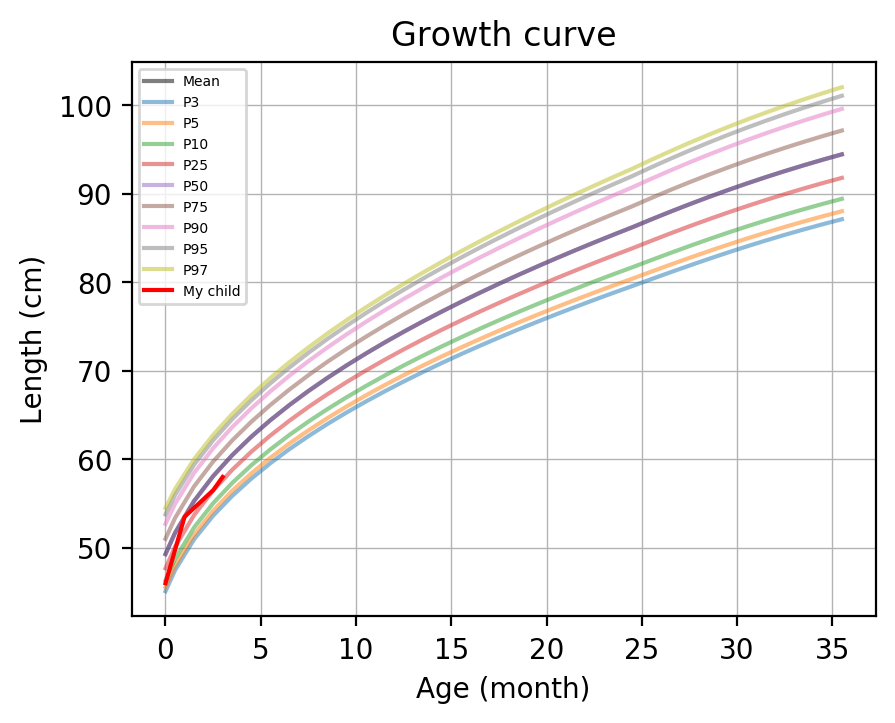

In [10]:
# plot length data
header, data = reader('raw_data_length.csv')
plot('Length (cm)', data_length)

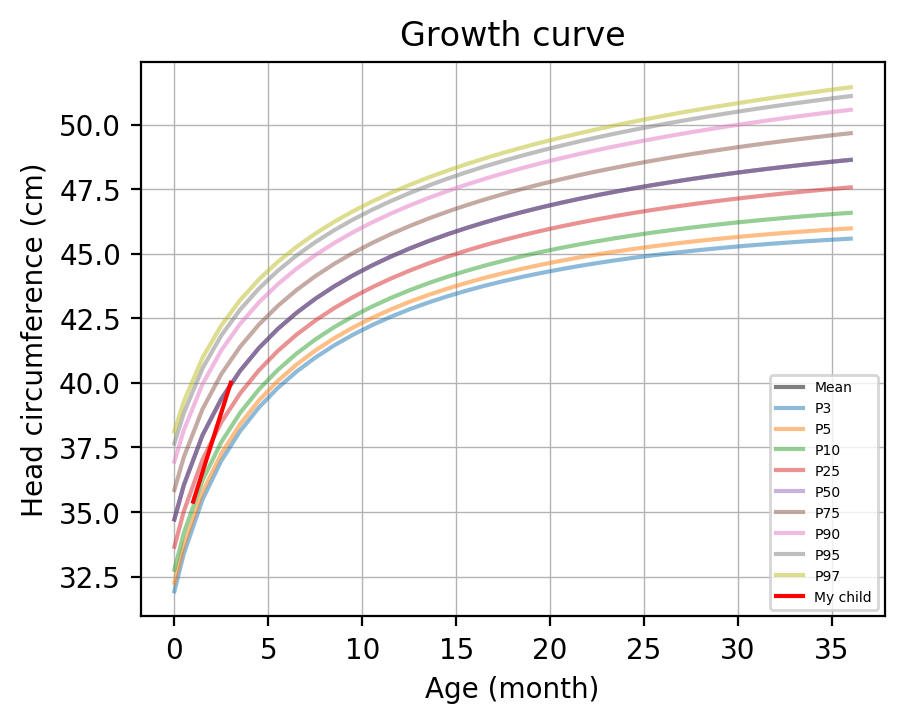

In [11]:
# plot head circumference data
header, data = reader('raw_data_head_circumference.csv')
plot('Head circumference (cm)', data_head_circumference)